## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# mounting the drive with collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import liberaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore') #Used when finding the outliers

In [3]:
#adding path of data file
path="/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Hotel_booking/Copy of Hotel Bookings.csv"
df=pd.read_csv(path) # reading csv file and named as df

In [4]:
# Looking at information of the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# finding the total nan values

print(df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
#agent and company has highest number of nan values so drop those columns
df.drop(["agent","company"], axis =1 , inplace = True)

In [7]:
#children as less nan values so we will fill it by 0
df["children"] = df["children"].fillna(0)

# 1. Length of stay Box plot

In [8]:
#Let's remove the outliers for length of stay
df = df.loc[df['stays_in_weekend_nights'] < df['stays_in_weekend_nights'].quantile(0.99)]
df = df.loc[df['stays_in_week_nights'] < df['stays_in_week_nights'].quantile(0.99)]

In [9]:
#getting length of stay
df['length_of_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['length_of_stay'].tail()

119384    7
119385    7
119386    7
119387    7
119388    7
Name: length_of_stay, dtype: int64

Text(0, 0.5, 'Type of Hotel')

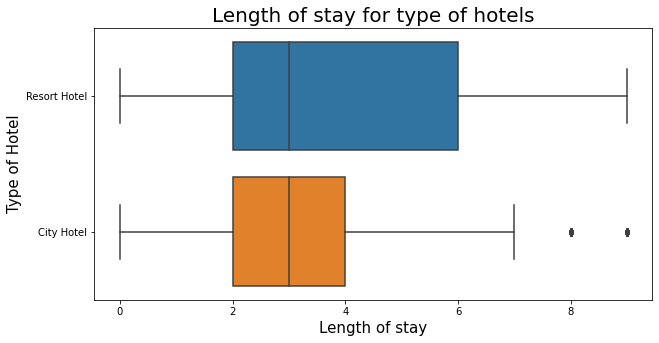

In [12]:
#Box plot for length of stay accoridng to Hotel type
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="length_of_stay", y="hotel", data=df, orient="h")
ax.set_title('Length of stay for type of hotels',fontsize = 20)
ax.set_xlabel("Length of stay", fontsize = 15)
ax.set_ylabel("Type of Hotel", fontsize = 15)




*   If we ignore the outliers, the maximum length of stay is more in resort type as resort is mostly used for vacation purpose.
*   Median of both the hotels are approximately equal.





#2. ADR for each hotel type according to year (Line Plot)

In [13]:
#group the adr mean according to year
adr_year = df.groupby(['arrival_date_year','hotel'])['adr'].mean().unstack()
adr_year

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,85.875011,89.054520
2016,103.484599,87.390964
2017,117.431089,108.211771


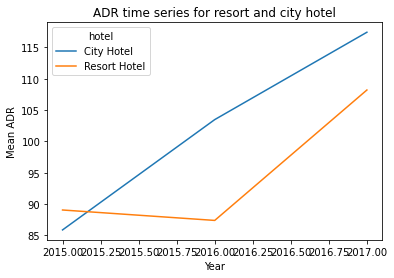

In [14]:
#line plot of adr year wise
adr_year.plot()

plt.title('ADR time series for resort and city hotel')
plt.ylabel('Mean ADR')
plt.xlabel('Year')
plt.rcParams['figure.figsize'] = (11, 5)



*   The mean ADR for city hotel increased with almost constant rate from 2015 to 2016.
*   The mean ADR for resort decreased from 2015 to 2016 but then increased from 2016 to 2017



#3. Total previous cancellation and not cancellation

In [16]:
#previous cancellation for each hotel type
number_of_cancel=df.groupby(['hotel'])['previous_cancellations'].sum()
number_of_cancel

hotel
City Hotel      6301
Resort Hotel    4016
Name: previous_cancellations, dtype: int64

In [15]:
#previously not canceled for each hotel type
number_of_notcancel=df.groupby(['hotel'])['previous_bookings_not_canceled'].sum()
number_of_notcancel

hotel
City Hotel      10444
Resort Hotel     5715
Name: previous_bookings_not_canceled, dtype: int64

Text(0, 0.5, 'Total previous cancelations')

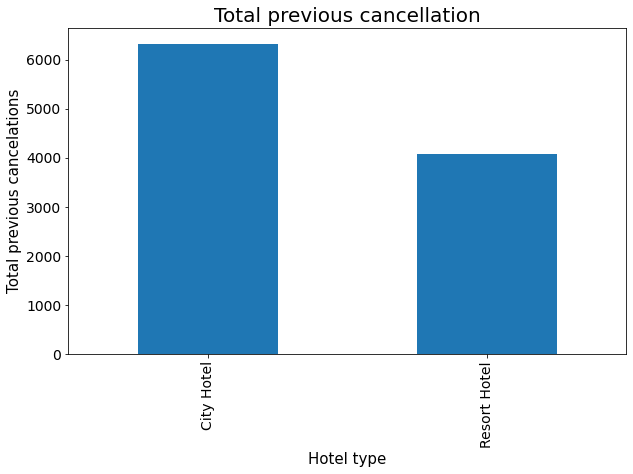

In [ ]:
# Create the figure object for canceled
cancel_number= number_of_cancel.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
cancel_number.set_title("Total previous cancellation", fontsize = 20)

# Set x and y-labels
cancel_number.set_xlabel("Hotel type", fontsize = 15)
cancel_number.set_ylabel("Total previous cancellations", fontsize = 15)



*   Total number of previously cancelled booking is more in city hotel than a resort hotel.



Text(0, 0.5, 'Sum of not cancelled previously')

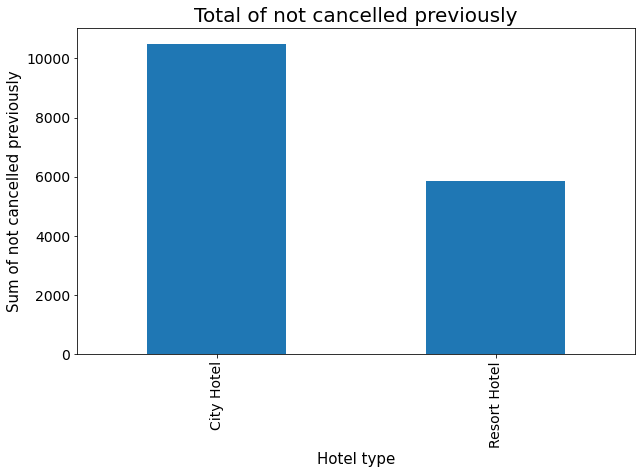

In [ ]:
# Create the figure object for not cancelled
notcancel_number= number_of_notcancel.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
notcancel_number.set_title("Total of not cancelled previously", fontsize = 20)

# Set x and y-labels
notcancel_number.set_xlabel("Hotel type", fontsize = 15)
notcancel_number.set_ylabel("Sum of not cancelled previously", fontsize = 15)

* Total number of previously not cancelled booking is more in city hotel than a resort hotel.
* The city hotel is used more frequently compared to resort hotel thus the canceled and not canceled booking will be more in city hotel.

#4. Total special request in each type of market segment

In [ ]:
#total special request for market segments
total_special_request=df.groupby(['market_segment'])['total_of_special_requests'].sum()
total_special_request


market_segment
Aviation            27
Complementary      693
Corporate         1217
Direct            7262
Groups            1727
Offline TA/TO     6491
Online TA        50795
Undefined            3
Name: total_of_special_requests, dtype: int64

Text(0, 0.5, 'Total special requests')

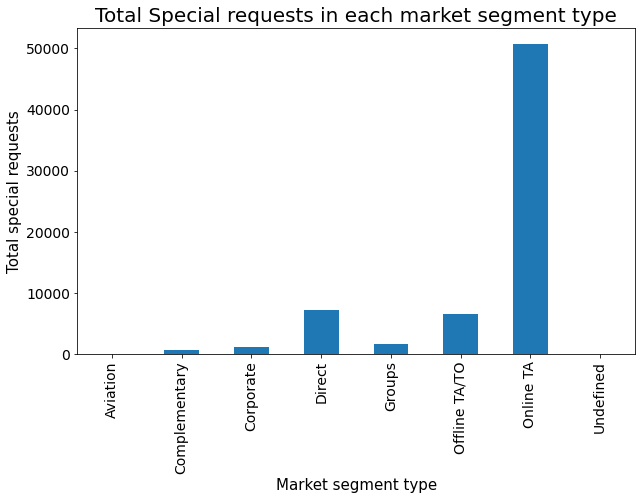

In [ ]:
# Create the figure object for totao_special_request
histogram_special_request=total_special_request.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
histogram_special_request.set_title("Total Special requests in each market segment type", fontsize = 20)

# Set x and y-labels
histogram_special_request.set_xlabel("Market segment type", fontsize = 15)
histogram_special_request.set_ylabel("Total special requests", fontsize = 15)



*   It can be observed that the total special requests are made by Online TA market segment.



#5.Sum of parking space according to type of booking


In [ ]:
#total parking space required table for each customer type
total_parking=df.groupby(['customer_type'])['required_car_parking_spaces'].sum()
total_parking

customer_type
Contract            135
Group                51
Transient          6440
Transient-Party     838
Name: required_car_parking_spaces, dtype: int64

Text(0, 0.5, 'Total of Parking space required')

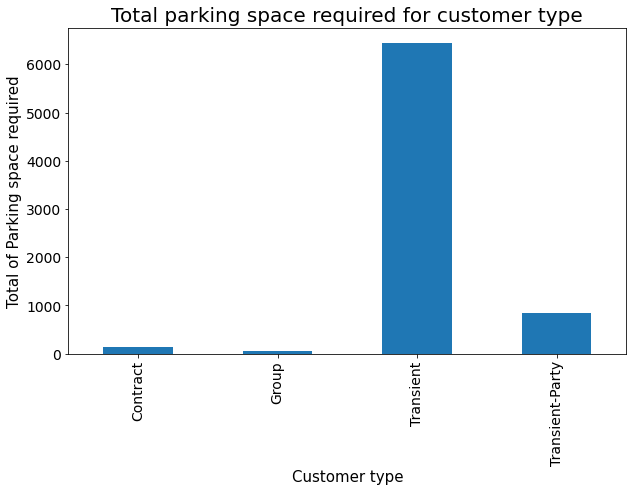

In [ ]:
# Create the figure object for total_parking
bar_parking=total_parking.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
bar_parking.set_title("Total parking space required for customer type", fontsize = 20)

# Set x and y-labels
bar_parking.set_xlabel("Customer type", fontsize = 15)
bar_parking.set_ylabel("Total of Parking space required", fontsize = 15)



*   When customer type is Transient that means the stay is more few days so it is possible that customer bringing his/her own vehicle that's why the parking space required it high for Transient
*   In contract and group booking customer will probably take a hired vehicle form hotel or from somewhere else that's why they do not need parking space.



#6. Total cancellations for each hotel type

In [17]:
#making a table for total_cancellation according to hotel type
total_cancellation=df.groupby(['hotel'])['is_canceled'].sum()
print(f"total_cancellation=\n{total_cancellation}")

#total bookings according to hotel type
total_bookings=df['hotel'].value_counts()
print(f"total_bookings=\n{total_bookings}")

#percentage of total_cancellation for both the bookings 
percentage_of_cancellation=np.round(total_cancellation*100/total_bookings,2)
print("--------------------------")
print(percentage_of_cancellation)

total_cancellation=
hotel
City Hotel      32629
Resort Hotel    10284
Name: is_canceled, dtype: int64
total_bookings=
City Hotel      78537
Resort Hotel    37058
Name: hotel, dtype: int64
--------------------------
hotel
City Hotel      41.55
Resort Hotel    27.75
dtype: float64


Text(0, 0.5, 'Total cancellation')

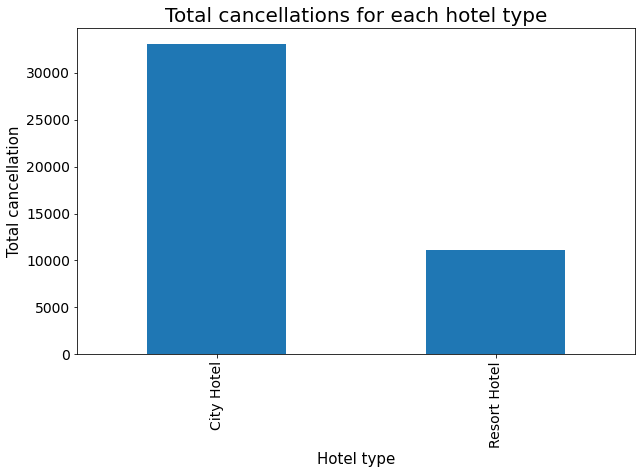

In [ ]:
# Create the figure object for total cancellation
bar_cancellation=total_cancellation.plot.bar(figsize = (10,6),fontsize = 14)

# Set the title
bar_cancellation.set_title("Total cancellations for each hotel type", fontsize = 20)

# Set x and y-labels
bar_cancellation.set_xlabel("Hotel type", fontsize = 15)
bar_cancellation.set_ylabel("Total cancellation", fontsize = 15)

*   The total booking for city hotel is more compared to resort and so the total cancellation is also large for city hotels.

